source: https://rapidminer.com/blog/data-prep-time-consuming-tedious/, data origionall published on Forbes
<br>
<img src="../images/data_prep_time.jpeg"
     alt="Markdown Monster icon"
     height=600
     width= 1000
     style="float: left; margin-right: 0.5px;" />

## we spend ~80% of our time on prep, and we seem to enjoy this the least. Lets spend an hour talking about that!
___

# a little about me first:
* I'm a PhD candidate in Biomedical Informatics at Northwestern 
* I found this field completely on accident and after failing a few times
* I spent a 8 years of my life (college + 4 years after) working to get into medical school and was rejected twice
* In this time, I worked in a Hematopathology/Genetics laboratory doing clinical & research work. 
* I stumbled retrospective data cleaning & analysis during this time
* I accidently fell in love with it ->  quarter life crysis -> -> now I'm getting a PhD


# I wrote this workshop for the person I was 8,6,4, 2, and 1 year(s) ago
* a person who is curious what kind of work is involved in perparing data
* a person who is given clinical data and tasked with doing somthing with it without being trained how to do so
* a person who sees both the potential and barriers in leveraging Electronic Health Record data
* a person who is learning how to work with data in python, but can't find examples that are commented and well explained
* a person who does clinical data science, and wants to see how another person does it for reference

# Agenda
1. Introduce a basic clinical datascience workflow structure
1. Describe the dataset
1. provide an annotated demo of a short clinical datascience workflow
    * focus on questions to ask & code to run them

# Code Inspiration:
* prediction task & workflow inspired by: https://github.com/alistairewj/challenge2012/blob/master/prepare-data.ipynb
* my own research: https://github.com/geickelb/mimiciii-antibiotics-opensource

----------
# 1. Introduce components of a basic clinical datascience framework
----------

### Example workflow:
<img src="../images/mimic_workflow_workshop3.png"
     alt="Markdown Monster icon"
     height=1000
     width= 1500
     style="float: left; margin-right: 0.5px;" />

----------
# 2. Describe our framework
----------

## Clinical Problem:
* in hospital mortality is a problem, and we want to be able to better predict it.

## Dataset
#### Source:
* https://physionet.org/content/challenge-2012/1.0.0/

#### Description:
* **MIMIC-III**:  
    * de-identified ICU dataset from Beth Israel Deaconess Medical Center
    * containing 12 years of patient care data (2001-2012)
    * data on over 61,000 ICU stays
* **Physionet 2012 challenge dataset**:
    * Subset of patients and variables from MIMIC-III dataset
    * **does not require all participants to sign up for a physionet account**
    * data on ~4,000 ICU stays
    * note: I have made some modifications to the origional challenge data to make it more easily usable


## Data Preparation
### Cohort Specification (already done for us)
* **Inclusion**
    * All patients were adults who were admitted for a wide variety of reasons to cardiac, medical, surgical, and trauma ICUs. 
* **Exclusion**
    * ICU stays of less than 48 hours
* **Outcomes**
    * Multiple outcomes are provided (see documentation)
    * Our chosen outcome: In Hospital Mortality (y/n)


### Data Extraction (already done for us)
* **Structured Variables**
    * Up to 42 variables were recorded at least once during the first 48 hours after admission to the ICU. 
    * Sparce: Not all variables are available in all cases
    * Static variables: 6 of these variables are general descriptors (collected on admission)
    * Longitudinal variables: 36 longitudinal time series variables (multiple observations may be available)
    * time stamp: time after ICU admission (HH:MM) 


### Data Cleaning (TODO)
### Preprocessing( TODO)
## Modeling (see modeling.ipynb)
## Model Evaluation (see modeling.ipynb)

-------
# 3. demo with focus on questions to ask and the code to ask them: 
1. What does my dataset look like, and what do the columns mean?
1. What kinds of data do i have in my dataset?
1. do certain kinds of data need to be handled differently?
1. How is my dataset formatted and how could I format it? 
1. What kinds of data do i have?
1. do certain kinds of data need to be handled differently?
1. does my dataset have erroneous values?
1. How is data collected and are values missing? 

-------

# The preamble python stuff: importing the packages and datasets

In [1]:
## importing packages
import pandas as pd # a brilliant package for data manipulation & analysis, this package introduces a "dataframe" similar to that in R.
import os # default package that is included with python, helpful for filepath stuff. 
import numpy as np # a foundational package for  arrays, matricies, and associated mathmatical operations
import matplotlib.pyplot as plt # a foundational plotting and datavisualization library, highly customizable, but a bit less user friendly
import seaborn as sns # a newer plotting library, less customizable, but has better default settings & is much easier to plug and play

In [2]:
## importing datasets
df = pd.read_csv('../data/set-b_predictors.csv') ## assumes your working directory is the base of this github repo.
y = pd.read_csv('../data/set-b_outcomes.csv') ## assumes your working directory is the base of this github repo.

### for debugging if above doesn't work
# the above code is written assuming your working directory is the base of this github repo.
# os.getcwd() #useful command to see what your current working directory (or implied) is. 
# os.chdir(path) #command to change the CWD, where path should be to the MIMIC-III_to_Model base folder. for me source ='/Users/geickelb1/Documents/GitHub/MIMIC-III_to_Model/'

remember, we can think of data preparation as a 4 stage process: **Cohort specification, Data Extraction, Data Cleaning, and Preprocessing**.

in this demo, **Cohort speficiation** and **Data Extraction** have already been performed for us so we can focus on the steps of **Data Cleaning** and **Preprocessing**.



<a id="Data_Cleaning"></a>
# Data Cleaning: because garbage in == garbage out. 

1. **What does my dataset look like, and what do the columns mean?**
1. What kinds of data do i have in my dataset?
1. do certain kinds of data need to be handled differently?
1. How is my dataset formatted and how could I format it? 
1. What kinds of data do i have?
1. do certain kinds of data need to be handled differently?
1. does my dataset have erroneous values?
1. How is data collected and are values missing? 

# [don't know where to put this]
* data quality issues to look out for
* duplicate entries (or two entries in one window)
* erroneous values
* missing values

lets get a quick sense of what the data looks like and what the columns mean:

In [3]:
df.head(5)  #show the first 5 rows of the dataframe

,time,parameter,value,recordid
0,00:00,RecordID,144404.0,144404
1,00:00,Age,71.0,144404
2,00:00,Gender,1.0,144404
3,00:00,Height,172.7,144404
4,00:00,ICUType,4.0,144404


**column descriptions:**
* time: the amount of time that has passed since ICU admission
* parameter: the name of the parameter in question
* value: value of the parameter in question
* recordid: the foreign key tied to each unique ICU admission/stay

1. How **is** the data structured & how **do we want it** structured?
    * Common structures:
        * long: **multiple rows per timepoint** with single value column (valuenum) and label (vitalid); (perferred when cleaning):  
        * wide: **one row per timepoint** with a column for each measurement;
            * ![long_wide_data](../images/long_wide_data.png)


<details> 
  <summary> how is our data structured? (click to reveal answer)<b> </summary>
   long format 
</details>

long format is helpful because the number of columns doesn't change, and we can address each group through iteration or split-apply-combine operations

### useful tools:
convert wide to long: 
* pandas.melt() 
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

convert long to wide:
* df.pivot()
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot

#### remember, for modeling we ultimately need a wide format dataframe where each recordid has a single row. 
**my recommended approach: get the dataframe into long format -> perform all the cleaning/preprocessing -> pivot to wide format**

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>How **is** the data formatted & how **do we want it** formatted?
1. **What kinds & types of data do i have in my dataset?**
       * types: float, int, string, mixed...
       * kinds: longitudinal, static


#### lets first look at data types for every parameter:

In [4]:
## groupby[value].apply is a: split-apply-combine type operation. 
(df
     .groupby('parameter') #split each paramter into groups
         ['value'] #look at the value column for each group
             .apply(np.dtype)) #apply the np.dtype() function to each group of values

parameter
ALP            float64
ALT            float64
AST            float64
Age            float64
Albumin        float64
BUN            float64
Bilirubin      float64
Cholesterol    float64
Creatinine     float64
DiasABP        float64
FiO2           float64
GCS            float64
Gender         float64
Glucose        float64
HCO3           float64
HCT            float64
HR             float64
Height         float64
ICUType        float64
K              float64
Lactate        float64
MAP            float64
MechVent       float64
Mg             float64
NIDiasABP      float64
NIMAP          float64
NISysABP       float64
Na             float64
PaCO2          float64
PaO2           float64
Platelets      float64
RecordID       float64
RespRate       float64
SaO2           float64
SysABP         float64
Temp           float64
TroponinI      float64
TroponinT      float64
Urine          float64
WBC            float64
Weight         float64
pH             float64
Name: value, dtype: obje

we now know all of our data is numerical, so we don't have to deal with any text

#### now lets explore the kinds of data we have:

if we look back to the data extraction details, we know we have both **static** (ie taken on admission) and **longitudinal variables**.


visualization for longitudinal variables over time can look across multiple patients :

<img src="../images/async_uneven_imbalanced4.png" 
     height=400
     width= 400
     alt="Example Visualization of a Snapshot (aggregated) Prediction Model" 
     title="Snapshot Variable Prediction Model" />

In [5]:
## groupby[value].apply is a: split-apply-combine type operation. 
(df
     .groupby(['parameter']) #split each parameterinto groups
         ['value'] #look at the value column in each group
             .count()) #count the number of values we see

parameter
ALP              3209
ALT              3302
AST              3301
Age              4000
Albumin          2450
BUN             13891
Bilirubin        3329
Cholesterol       356
Creatinine      13959
DiasABP        146210
FiO2            31591
GCS             62566
Gender           4000
Glucose         13154
HCO3            13612
HCT             18439
HR             228606
Height           4000
ICUType          4000
K               14667
Lactate          8461
MAP            146458
MechVent        30215
Mg              13725
NIDiasABP       99262
NIMAP           97883
NISysABP        99420
Na              13721
PaCO2           22840
PaO2            22774
Platelets       14349
RecordID         4000
RespRate        56359
SaO2             7592
SysABP         146259
Temp            84552
TroponinI         376
TroponinT        2169
Urine          137123
WBC             13092
Weight         129438
pH              23825
Name: value, dtype: int64

In [6]:
df.recordid.nunique()

4000

takeaway: we have 4000 patients, so if this count is above 4000, we know it has been measured more than once per each patient. 

In [7]:
## going one step further lets ask: for all of the parameters, what is the maximum number of patients that have them. if this is higher than 4000 (# pt in the dataset), we should investigate
df.groupby('parameter')['recordid'].nunique()

parameter
ALP            1689
ALT            1735
AST            1736
Age            4000
Albumin        1631
BUN            3944
Bilirubin      1728
Cholesterol     343
Creatinine     3944
DiasABP        2811
FiO2           2702
GCS            3935
Gender         4000
Glucose        3912
HCO3           3939
HCT            3940
HR             3935
Height         4000
ICUType        4000
K              3927
Lactate        2215
MAP            2806
MechVent       2511
Mg             3917
NIDiasABP      3518
NIMAP          3516
NISysABP       3534
Na             3937
PaCO2          3012
PaO2           3011
Platelets      3938
RecordID       4000
RespRate       1127
SaO2           1753
SysABP         2811
Temp           3935
TroponinI       181
TroponinT       942
Urine          3904
WBC            3934
Weight         4000
pH             3031
Name: recordid, dtype: int64

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. **do certain kinds of data need to be handled differently?**


longitudinal data has numerous timepoints over our datacollection window; 
static data has one timepoint (at admission)

**answer: Yes.** longitudinal and static data is often much easier to handle when seperated.

algorithm to seperate:
#### our algorithm to seperate them:
1. filter to rows of static data (we know this was taken upon admission, so time will = 00:00
1. filter to parameters we know are ONLY measured at 00:00 
1. copy this filtered dataframe as df_static
1. remove the filtered rows from the longtidinal dataframe 



In [8]:
# filter to rows of static data (we know this was taken upon admission, so time will = 00:00
df_static = df.loc[df['time'] == '00:00', :].copy() #filter the dataframe to only rows with time == "00:00" and asign a copy of this to the name df_static

# filter to parameters that we know correspond to static data:
static_vars = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight'] #note the recordid here is redundant.

#copy this filtered dataframe as df_static
df_static = df_static.loc[df['parameter'].isin(static_vars)]

# remove the filtered rows from the longtidinal dataframe
idxDrop = df_static.index
df = df.loc[~df.index.isin(idxDrop), :]

In [9]:
# now lets check that df doesn't have the static vars, and vice versa

In [10]:
df['parameter'].unique()

array(['DiasABP', 'GCS', 'HR', 'MAP', 'NIDiasABP', 'NIMAP', 'NISysABP',
       'SysABP', 'Temp', 'Urine', 'Weight', 'FiO2', 'MechVent', 'pH',
       'PaCO2', 'PaO2', 'SaO2', 'Albumin', 'ALP', 'ALT', 'AST',
       'Bilirubin', 'BUN', 'Creatinine', 'Glucose', 'HCO3', 'HCT', 'Mg',
       'Platelets', 'K', 'Na', 'WBC', 'Lactate', 'Cholesterol',
       'RespRate', 'TroponinT', 'TroponinI'], dtype=object)

In [11]:
df_static['parameter'].unique()

array(['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight'],
      dtype=object)

In [12]:
## lets ask: for all of the parameters, what is the maximum number of patients that have them. if this is higher than 4000 (# pt in the dataset), we should investigate
df.groupby('parameter')['recordid'].nunique()

parameter
ALP            1689
ALT            1735
AST            1736
Albumin        1631
BUN            3944
Bilirubin      1728
Cholesterol     343
Creatinine     3944
DiasABP        2811
FiO2           2702
GCS            3935
Glucose        3912
HCO3           3939
HCT            3940
HR             3935
K              3927
Lactate        2215
MAP            2806
MechVent       2511
Mg             3917
NIDiasABP      3518
NIMAP          3516
NISysABP       3534
Na             3937
PaCO2          3012
PaO2           3011
Platelets      3938
RespRate       1127
SaO2           1753
SysABP         2811
Temp           3935
TroponinI       181
TroponinT       942
Urine          3904
WBC            3934
Weight         2682
pH             3031
Name: recordid, dtype: int64

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. <del>do certain kinds of data need to be handled differently?
1. QC: are there any duplicate values that need to be addressed?

    

In [13]:
#complicated query, lets break it down:
(df_static.groupby(['recordid','parameter']) #groupby unique combinations of recordid and parameter (ie a composite key)
                 [['value']] #(in this grouped by set, look at the value column)
                     .count() #count the number of values per recordid-parameter composite key
                         .sort_values('value',ascending=False) #sort the counts in decending order.
)

value
recordid parameter       
149509   Weight         2
142675   Age            1
149427   Age            1
149428   ICUType        1
         Height         1
...                   ...
146059   Weight         1
         RecordID       1
         ICUType        1
         Height         1
152864   Weight         1

[24000 rows x 1 columns]

In [14]:
# a more direct answer to the question but with less information (ie cant see which value is duplicated)
df_static.groupby(['recordid', 'parameter'])[['value']].count().max() 

value    2
dtype: int64

In [15]:
# solution: pick the last value when there is a duplicate
df_static = df_static.groupby(['recordid', 'parameter'])[['value']].last()
df_static.reset_index(inplace=True)

any duplicate values in the longitudinal data will be addressed when we look at distribution, and aggregate later

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. <del>do certain kinds of data need to be handled differently?
1. <del>QC: are there any duplicate values that need to be addressed?
1. QC: what do the distributions of static variables look like? 
    * look for erroneous or nonsensical values
    * can you tell if error is due to order of magnitude, unit of measurement, or random?
    

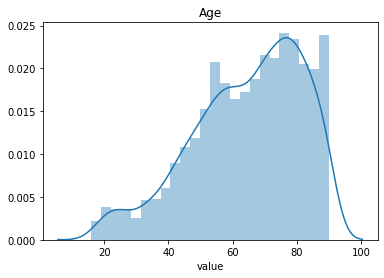

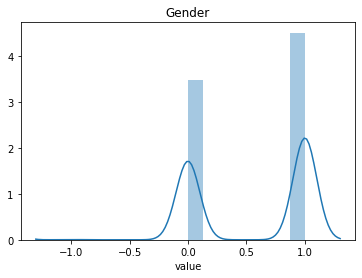

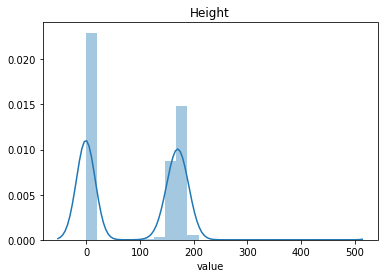

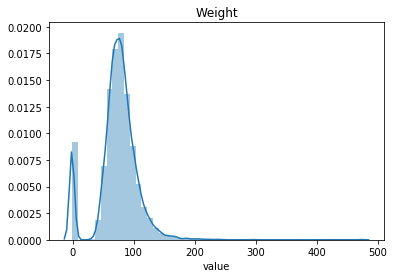

In [16]:
for element in df_static['parameter'].unique():
    if element not in  ['RecordID','ICUType']:
        (sns.distplot( #make a distribution plot
            df_static.loc[ #get the df_static rows/col with the following criteria
                (df_static['parameter']==element) & (df_static['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

takeaways: 
* weight: what is this distibution of weight around 0? 

In [17]:
df_static.loc[(df_static['parameter']=='Weight') & (df_static['value']<40),'value'].describe()

count    359.000000
mean       0.264624
std        6.827774
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max       39.900000
Name: value, dtype: float64

takeaway:
* we see there is are a large # of weight=-1. lets look into one of these:

In [18]:
df_static[df_static['parameter']=='Weight']

,recordid,parameter,value
5,142675,Weight,85.00
11,142676,Weight,-1.00
17,142680,Weight,78.80
23,142683,Weight,145.20
29,142688,Weight,90.00
...,...,...,...
23975,152849,Weight,83.18
23981,152851,Weight,87.00
23987,152858,Weight,74.00
23993,152862,Weight,57.00


lets look into one or two of these in the origional dataframe:

In [19]:

df_origional = pd.read_csv('../data/predictors.csv') ## assumes your working directory is the base of this github repo.
df_origional[(df_origional['parameter']=='Weight') & (df_origional['recordid']==152864)]

,time,parameter,value,recordid
1369145,00:00,Weight,-1.0,152864


In [20]:
df_origional[(df_origional['parameter']=='Weight') & (df_origional['recordid']==142676)]

,time,parameter,value,recordid
352876,00:00,Weight,-1.0,142676


unclear what these are, and documentation doesn't say. for now we can replace with a null value and impute them later. 

In [21]:
del(df_origional) #removing this from memory 
df_static.loc[(df_static['parameter']=='Weight') & (df_static['value']==-1),'value']=np.nan

In [22]:
# lets look back at the distribution after removing them:
df_static.loc[(df_static['parameter']=='Weight') & (df_static['value']<40),'value'].describe()

count    12.000000
mean     36.833333
std       2.815972
min      30.000000
25%      36.375000
50%      37.350000
75%      38.925000
max      39.900000
Name: value, dtype: float64

### so we have an idea how to investigate values that need to be replaced, lets write a function that will make replacing these values easy:

In [23]:
def replace_value(df, parameter, replacement, threshold=None, threshold2=None, operator=None):
    """returns a dataframe where the erroneous values specified by the keyword arguments are replaced or nullified. 

    Keyword arguments:
        df -- dataframe of longtiduinal values (dtype='dataframe', required)
        parameter  -- df parameter to replace erroneous values on (dtype='string', required)
        replacement -- value or modifier to replace specified erroneous values with (dtype='string', required)
        threshold -- value that the operator is applied to to be considered erroneous  (dtype=int, required)
        threshold2 -- only used for between.  (dtype=int, required)
        operator --  '>' or '<', considered by the threshold to determine erroneous values (dtype='string', required)
    """ 
    filtered = df['parameter'] == parameter

    if operator =='<':
        filtered = filtered & (df['value'] < threshold)

    elif operator =='>':
        filtered = filtered & (df['value'] > threshold)

    elif operator =='between':
        filtered = filtered & (df['value'] > threshold) & (df['value'] < threshold2)
        
    else:
        filtered = filtered & (df['value'] == threshold)


    if 'function' in str(type(replacement)): # if value replacement is a function, then apply that function, else just put the value in
        # value replacement is a function of the input:
        df.loc[filtered, 'value'] = df.loc[filtered, 'value'].apply(replacement)
    else:
        df.loc[filtered, 'value'] = replacement
        
    return df


In [24]:
##### Heights
df_static = replace_value(df_static, parameter='Height', replacement=np.nan, threshold=0, operator='<')

# values less than 10 -> multiply by 100
df_static = replace_value(df_static, parameter='Height', replacement=lambda x: x*100, threshold=10, operator='<')

# values less than 25 -> multiply by 10
df_static= replace_value(df_static, parameter='Height', replacement=lambda x: x*10, threshold=25, operator='<')

# values between 25-100 -> *2.2 (inch -> cm)
df_static= replace_value(df_static, parameter='Height', replacement=lambda x: x*2.2, threshold=100, operator='<')

# values greater than 400 -> divide by 10
df_static= replace_value(df_static, parameter='Height', replacement=lambda x: x*0.1, threshold=400, operator='>')

In [25]:
### Age
# replace anonomized ages (above 91.4) with 91.4
df_static = replace_value(df_static, parameter='Age', replacement=91.4, threshold=130, operator='>')

In [26]:
### Weight
# replace erroneous weight (<35) or (>299)
df_static = replace_value(df_static, parameter='Weight', replacement=np.nan, threshold=35, operator='<')
df_static = replace_value(df_static, parameter='Weight', replacement=np.nan, threshold=299, operator='>')


In [27]:
### Gender
df_static = replace_value(df_static, parameter='Gender', replacement=np.nan, threshold=0, operator='<')

1. <del>What does my dataset look like, and what do the columns mean?
1. <del>What kinds of data do i have in my dataset?
1. <del> What kinds & types of data do i have in my dataset?
1. <del>do certain kinds of data need to be handled differently?
1. <del>QC: are there any duplicate values that need to be addressed?
1. <del>QC: what do the distributions of static variables look like? 
1. QC: what do the distributions of longitudinal variables look like? 
    * look for erroneous or nonsensical values
    * can you tell if error is due to order of magnitude, unit of measurement, or random?


In [28]:
len(df['parameter'].unique()) #there are 37 different longitudinal variables

37

lets look at the distribution of the longitudinal variables in groups of 10, since there are 37 of them

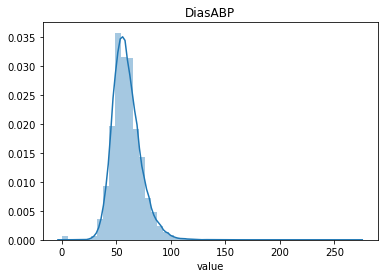

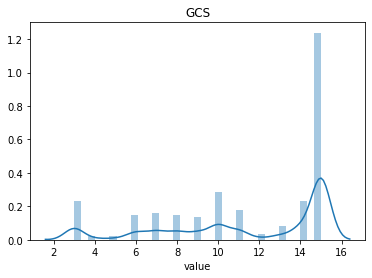

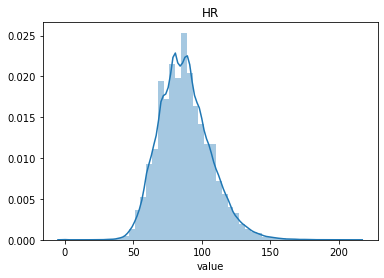

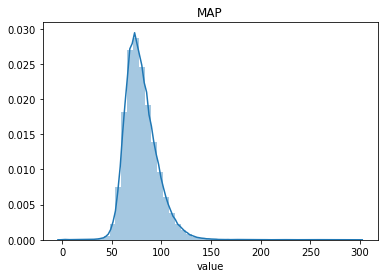

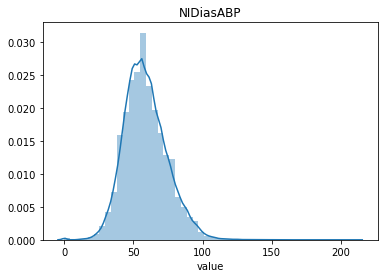

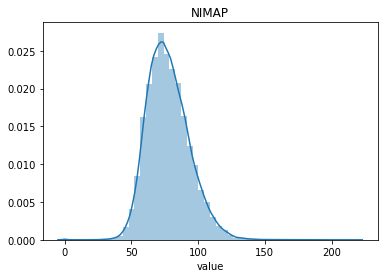

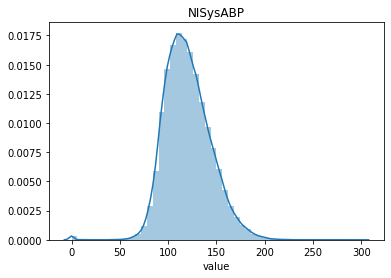

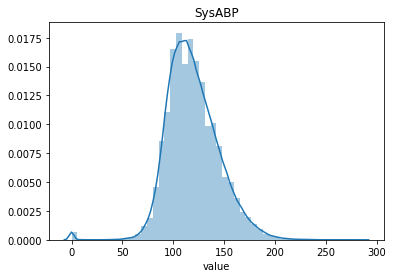

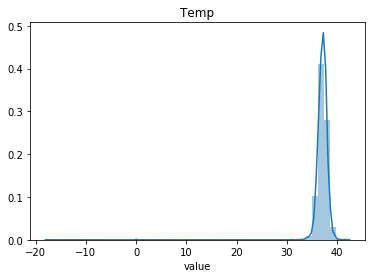

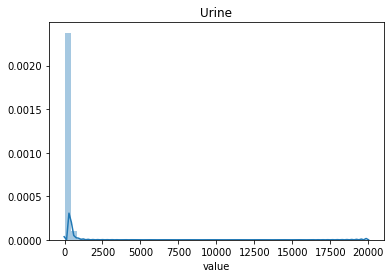

In [29]:
#warning large output
for element in df['parameter'].unique()[0:10]:
    if element not in  ['RecordID','ICUType']:
        (sns.distplot( #make a distribution plot
            df.loc[ #get the df_static rows/col with the following criteria
                (df['parameter']==element) & (df['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

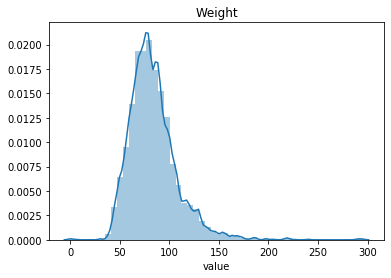

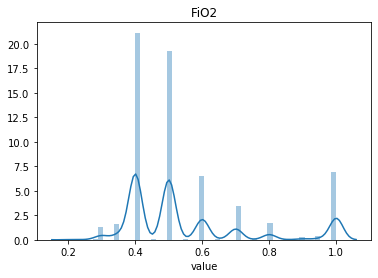

/Users/geickelb1/anaconda/envs/mimic_model/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/geickelb1/anaconda/envs/mimic_model/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


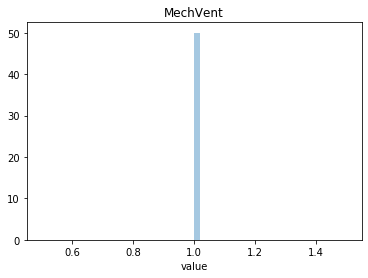

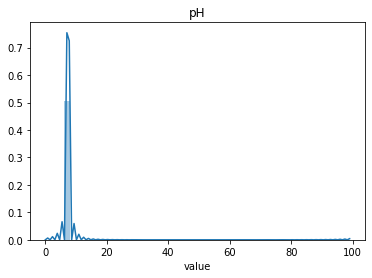

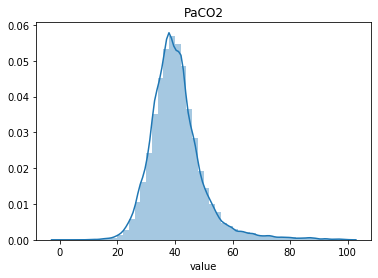

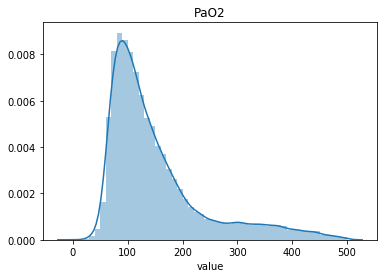

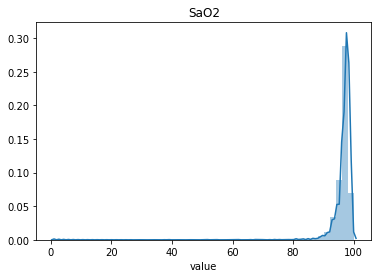

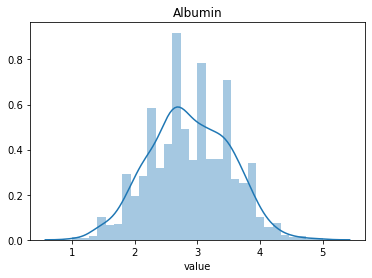

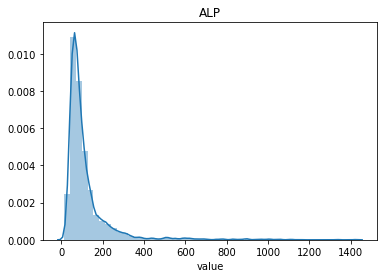

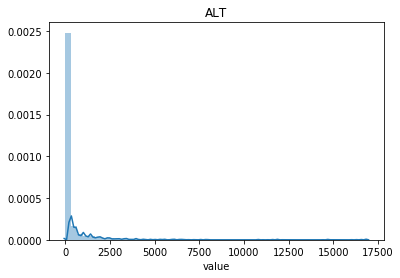

In [30]:
#warning large output
for element in df['parameter'].unique()[10:20]:
    if element not in  ['RecordID','ICUType']:
        (sns.distplot( #make a distribution plot
            df.loc[ #get the df_static rows/col with the following criteria
                (df['parameter']==element) & (df['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

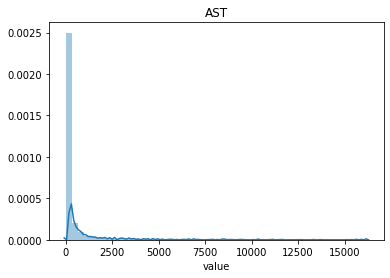

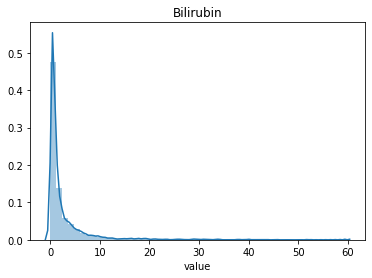

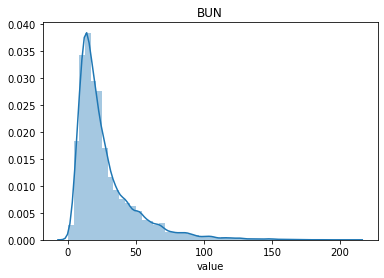

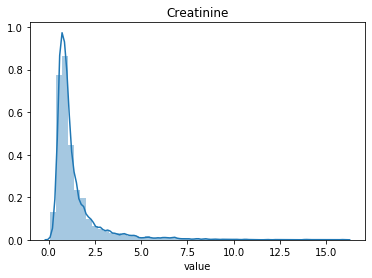

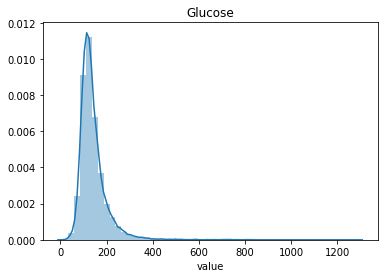

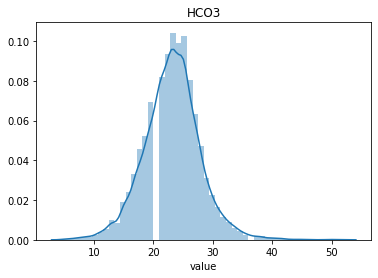

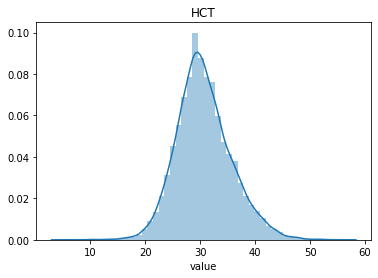

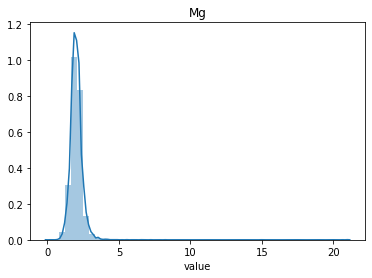

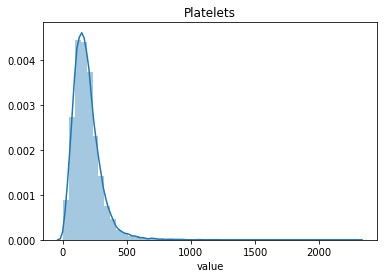

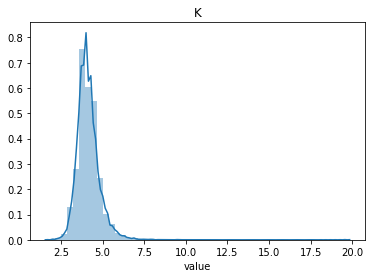

In [31]:
#warning large output
for element in df['parameter'].unique()[20:30]:
    if element not in  ['RecordID','ICUType']:
        (sns.distplot( #make a distribution plot
            df.loc[ #get the df_static rows/col with the following criteria
                (df['parameter']==element) & (df['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

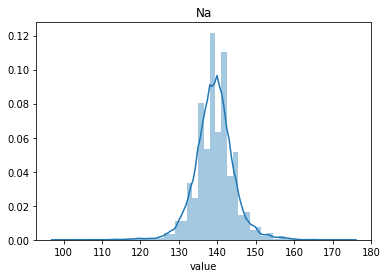

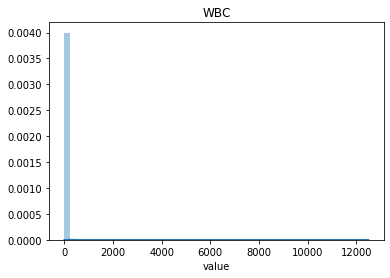

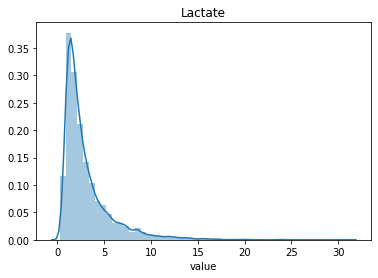

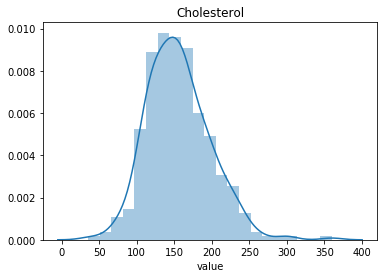

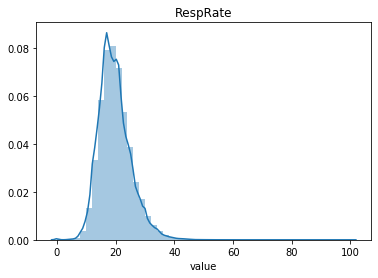

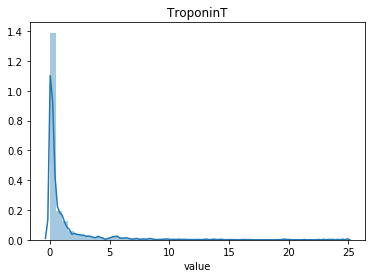

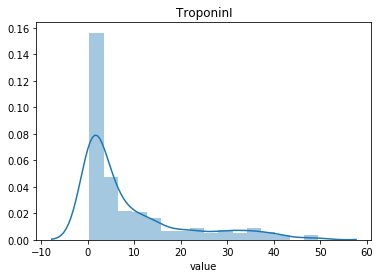

In [32]:
#warning large output
for element in df['parameter'].unique()[30:]:
    if element not in  ['RecordID','ICUType']:
        (sns.distplot( #make a distribution plot
            df.loc[ #get the df_static rows/col with the following criteria
                (df['parameter']==element) & (df['value']).notnull(),'value']) # rows where parameter== element, and the value is not null; columns='value'
                     .set_title(element))
        plt.show()

In [33]:

### now for lots of value cleanup
df = replace_value(df, parameter='DiasABP', replacement=np.nan, threshold=-1)
df = replace_value(df, parameter='DiasABP', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'DiasABP', replacement=np.nan, threshold=200, operator='>')

df = replace_value(df, 'SysABP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'MAP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NIDiasABP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NISysABP',replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NIMAP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'HR', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'HR', replacement=np.nan, threshold=299, operator='>')

df = replace_value(df, 'PaCO2', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'PaCO2', replacement=lambda x: x*10, threshold=10, operator='<')

df = replace_value(df, 'PaO2', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'PaO2', replacement=lambda x: x*10, threshold=20, operator='<')

# the order of these steps matters
df = replace_value(df, 'pH', replacement=lambda x: x*10, threshold=0.65, threshold2=0.8, operator='between')
df = replace_value(df, 'pH', replacement=lambda x: x*0.1, threshold=65, threshold2=80, operator='between')
df = replace_value(df, 'pH', replacement=lambda x: x*0.01, threshold=650, threshold2=800, operator='between')
df = replace_value(df, 'pH', replacement=np.nan, threshold=6.5, operator='<')
df = replace_value(df, 'pH', replacement=np.nan, threshold=8, operator='>')

# convert to farenheit
df = replace_value(df, 'Temp', replacement=lambda x: x*9/5+32, threshold=1, threshold2=10, operator='between')
df = replace_value(df, 'Temp', replacement=lambda x: (x-32)*5/9, threshold=95, threshold2=113, operator='between')

df = replace_value(df, 'Temp', replacement=np.nan, threshold=25, operator='<')
df = replace_value(df, 'Temp', replacement=np.nan, threshold=45, operator='>')

df = replace_value(df, 'RespRate', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'WBC', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'WBC', replacement=np.nan, threshold=60, operator='>')

df = replace_value(df, 'Urine', replacement=lambda x: x/100, threshold=1000, operator='>')

df = replace_value(df, 'ALP', replacement=lambda x: x/10, threshold=500, operator='>')

df = replace_value(df, 'ALT', replacement=lambda x: x/100, threshold=200, operator='>')

df = replace_value(df, 'AST', replacement=lambda x: x/100, threshold=200, operator='>')

df = replace_value(df, 'Glucose', replacement=np.nan, threshold=1000, operator='>')

In [34]:
#this allows us to quickly look at each variable distribution
for element in df['parameter'].unique():
    print(element)
    print(df.loc[df['parameter']==element,'value'].describe())

DiasABP
count    145660.000000
mean         59.487581
std          12.821004
min           1.000000
25%          51.000000
50%          58.000000
75%          67.000000
max         196.000000
Name: value, dtype: float64
GCS
count    62566.000000
mean        11.441694
std          4.009528
min          3.000000
25%          8.000000
50%         14.000000
75%         15.000000
max         15.000000
Name: value, dtype: float64
HR
count    228585.000000
mean         87.545743
std          18.704029
min          10.000000
25%          74.000000
50%          86.000000
75%          99.000000
max         212.000000
Name: value, dtype: float64
MAP
count    146424.000000
mean         79.794623
std          17.100258
min           1.000000
25%          69.000000
50%          77.000000
75%          89.000000
max         298.000000
Name: value, dtype: float64
NIDiasABP
count    99170.000000
mean        58.771231
std         15.404759
min          7.000000
25%         48.000000
50%         57.000000

In [35]:
### longformat
(pd.pivot_table(df, values='value', index='recordid', columns='parameter') #make a pivot table w/ the new index=recordid, the columns= unique values in parameter, and the values = value
     .reset_index().rename_axis(None, axis=1) #by default it makes a multilevel index, which is a headache to deal with. this removes the multilevel
             .head() #show the first 5 rows of the dataframe
) 


,recordid,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,142675,23.0,99.500,33.3225,2.133333,15.571429,2.04,NaN,1.242857,57.838235,...,NaN,96.727273,118.117647,36.622917,NaN,NaN,239.775962,6.760000,NaN,7.379500
1,142676,NaN,NaN,NaN,NaN,25.600000,NaN,NaN,0.460000,NaN,...,17.666667,NaN,NaN,36.550000,NaN,NaN,90.482143,18.750000,NaN,NaN
2,142680,77.0,48.500,27.5000,NaN,22.333333,0.70,NaN,0.733333,58.857143,...,NaN,93.000000,109.642857,37.918182,NaN,NaN,173.793103,14.966667,79.263043,7.401429
3,142683,44.0,87.965,102.6650,2.300000,14.666667,1.25,NaN,1.233333,57.965517,...,NaN,92.666667,122.017241,37.253488,NaN,NaN,116.200000,20.487500,NaN,7.325000
4,142688,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,0.800000,58.956522,...,19.162162,NaN,114.956522,37.733333,NaN,NaN,94.333333,14.250000,NaN,7.370000


since we now know the format, lets see all of the different types of values that are recorded:

In [36]:
df['parameter'].unique() #useful function to get an array of all unique values in a list

array(['DiasABP', 'GCS', 'HR', 'MAP', 'NIDiasABP', 'NIMAP', 'NISysABP',
       'SysABP', 'Temp', 'Urine', 'Weight', 'FiO2', 'MechVent', 'pH',
       'PaCO2', 'PaO2', 'SaO2', 'Albumin', 'ALP', 'ALT', 'AST',
       'Bilirubin', 'BUN', 'Creatinine', 'Glucose', 'HCO3', 'HCT', 'Mg',
       'Platelets', 'K', 'Na', 'WBC', 'Lactate', 'Cholesterol',
       'RespRate', 'TroponinT', 'TroponinI'], dtype=object)

it looks like there are both static (RecordId, Age, Gender, Height, ICUType, Weight) & longitudinal values in this dataframe

## ensure numerical looking data is in a 'numerical' (int, float, double, etc) format

### concept: apply and map functions.
* Map: It ITERATES OVER EACH ELEMENT of a series.
  * df['column1'].map(lambda x: 10+x), this will add 10 to each element of column1. ...
* Apply: As the name suggests, applies a function ALONG AN AXIS (rows or cols) of the DataFrame. 
  * df[[‘column1’,’column2’]].apply(sum), it will returns the sum of all the values of column1 and column2.
  * axis=0: row index;  axis=1: col index

In [37]:
#df_static= df_static.apply(pd.to_numeric, axis=1) #note we have to assign the df_static to the applyed dataframe, otherwise the dataframe is not changed. 

# datacleaning complete, now on to preprocessing

-------
# Preprocessing
-------

## Create a design matrix X for modeling.
1. aggregate all longitudinal variables using the desired aggregation functions. 
1. reformat df_static from long to wide, call this X
1. clean up format by dropping RecordID, ICUType, and reformat ICUtype into a categorical variable.
1. merge all aggregated longitudinal data onto X.
1. attach outcomes to X
1. train/test split
    * (optional) sample to reduce effect of class imballance
1. standardize and scale values (encouraged)
1. impute missing/null values
1. finalize matrix for modeling

1. **aggregate all longitudinal variables using the desired aggregation functions :**

In [38]:
def aggregate_and_pivot(df,aggregation='mean'):
    """returns a dataframe where the columns are each type of vital measurement, with 1 row for each hadm_id and the values are aggregated according to the specified aggregate function. 

    Keyword arguments:
    vitals_df -- the cleaned up vitals dataframe (dtype='dataframe', required)
    aggregation -- string specifying the desired aggregation function ('mean', 'max', 'std'). (dtype='str', default='mean')
    """
    
    pivot_df=pd.DataFrame()
    
    ###aggregating all values for each hadm_id and vitalid
    if aggregation=='mean':
        group_agg=df.groupby(['recordid','parameter'])['value'].mean()
        
    elif aggregation=='max':
        group_agg=df.groupby(['recordid','parameter'])['value'].max()
        
    elif aggregation=='std':
        group_agg=df.groupby(['recordid','parameter'])['value'].std()
    
    else:
        pass
    
    ### making a pivot table off aggregated groupby
    pivot_df=pd.pivot_table(pd.DataFrame(group_agg),
                            values='value',
                            index=['recordid'],
                            columns=['parameter']).reset_index()

    adjusted_cols=[x+'_{}'.format(aggregation) for x in list(pivot_df)]

    #renaming columns to have _max after them
    pivot_df.columns= adjusted_cols
    #renaming the hadm id back to how it was origionally
    pivot_df.rename(index=str, columns={'recordid_{}'.format(aggregation):'recordid'}, inplace=True)
    pivot_df.set_index('recordid', inplace=True)
    return(pivot_df)

### note: for a better model, it makes more clinical sense to use the aggregation(s) that make most sense for each column, rather than just mean/std. 

In [39]:
mean_df= aggregate_and_pivot(df,'mean')
mean_df.head()

,ALP_mean,ALT_mean,AST_mean,Albumin_mean,BUN_mean,Bilirubin_mean,Cholesterol_mean,Creatinine_mean,DiasABP_mean,FiO2_mean,...,RespRate_mean,SaO2_mean,SysABP_mean,Temp_mean,TroponinI_mean,TroponinT_mean,Urine_mean,WBC_mean,Weight_mean,pH_mean
recordid,,,,,,,,,,,,,,,,,,,,,
142675,23.0,99.500,33.3225,2.133333,15.571429,2.04,NaN,1.242857,57.838235,0.846154,...,NaN,96.727273,118.117647,36.622917,NaN,NaN,239.775962,6.760000,NaN,7.379500
142676,NaN,NaN,NaN,NaN,25.600000,NaN,NaN,0.460000,NaN,NaN,...,17.666667,NaN,NaN,36.550000,NaN,NaN,90.482143,18.750000,NaN,NaN
142680,77.0,48.500,27.5000,NaN,22.333333,0.70,NaN,0.733333,58.857143,0.605000,...,NaN,93.000000,109.642857,37.918182,NaN,NaN,173.793103,14.966667,79.263043,7.401429
142683,44.0,87.965,102.6650,2.300000,14.666667,1.25,NaN,1.233333,57.965517,0.796154,...,NaN,92.666667,122.017241,37.253488,NaN,NaN,116.200000,20.487500,NaN,7.325000
142688,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,0.800000,58.956522,0.685714,...,19.162162,NaN,114.956522,37.733333,NaN,NaN,94.333333,14.250000,NaN,7.370000


In [40]:
std_df= aggregate_and_pivot(df,'std')
std_df.head()

,ALP_std,ALT_std,AST_std,Albumin_std,BUN_std,Bilirubin_std,Cholesterol_std,Creatinine_std,DiasABP_std,FiO2_std,...,RespRate_std,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std
recordid,,,,,,,,,,,,,,,,,,,,,
142675,3.391165,41.805103,48.484552,0.513160,5.126960,0.753658,NaN,0.525538,12.895227,0.240192,...,NaN,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404
142676,NaN,NaN,NaN,NaN,9.607289,NaN,NaN,0.151658,NaN,NaN,...,4.012392,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN
142680,0.000000,6.363961,2.121320,NaN,1.154701,0.000000,NaN,0.057735,11.141448,0.153811,...,NaN,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812
142683,7.071068,101.872874,117.853487,0.989949,4.041452,0.777817,NaN,0.288675,10.700001,0.171345,...,NaN,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249
142688,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.141421,5.439571,0.167616,...,3.515944,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN


2. **reformat df_static from long to wide, call this X**:

In [41]:
# reformat df_static from long to wide, call this X
X = df_static.pivot(index='recordid', columns='parameter', values='value').copy() # pivot on parameter so there is one column per parameter
X.drop('RecordID', axis=1, inplace=True)

3. **clean up format by dropping RecordID, ICUType, and reformat ICUtype into a categorical variable.**:

In [42]:
### MICU is ICUType==3, and is used as the reference category
X['CCU'] = (X['ICUType'] == 1).astype(int)
X['CSRU'] = (X['ICUType'] == 2).astype(int)
X['SICU'] = (X['ICUType'] == 4).astype(int)
X.drop('ICUType', axis=1, inplace=True)

4. **merging the static data with mean and std aggregations**:

In [43]:
X= pd.merge(X, mean_df, left_index=True, right_index=True)
X= pd.merge(X, std_df, left_index=True, right_index=True)

In [44]:
X.head()

,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,AST_mean,...,RespRate_std,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std
recordid,,,,,,,,,,,,,,,,,,,,,
142675,70.0,1.0,175.3,85.0,0,1,0,23.0,99.500,33.3225,...,NaN,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404
142676,57.0,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,...,4.012392,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN
142680,60.0,1.0,182.9,78.8,0,0,0,77.0,48.500,27.5000,...,NaN,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812
142683,64.0,1.0,180.3,145.2,0,1,0,44.0,87.965,102.6650,...,NaN,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249
142688,51.0,1.0,172.7,90.0,0,0,1,NaN,NaN,NaN,...,3.515944,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN


5. **attach outcomes to X**

In [45]:
# format the outcomes first   
y.set_index('RecordID', inplace=True)
y.index.name = 'recordid'

In [46]:
# attach outcomes to X
X = pd.merge(X,y['In-hospital_death'], how='inner', left_index=True, right_index=True)
X.reset_index(inplace=True)
X.head()

,recordid,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
0,142675,70.0,1.0,175.3,85.0,0,1,0,23.0,99.500,...,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404,1
1,142676,57.0,0.0,NaN,NaN,0,0,0,NaN,NaN,...,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN,0
2,142680,60.0,1.0,182.9,78.8,0,0,0,77.0,48.500,...,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812,1
3,142683,64.0,1.0,180.3,145.2,0,1,0,44.0,87.965,...,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249,0
4,142688,51.0,1.0,172.7,90.0,0,0,1,NaN,NaN,...,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN,0


In [47]:
X['In-hospital_death'].value_counts()

0    3425
1     567
Name: In-hospital_death, dtype: int64

In [48]:
len(X)

3992

6. **train/test split**
    * (optional) sample to reduce effect of class imballance

In [49]:
# 70/30 train/test set split with 12345=seed and ensuring even distibution of classes. 

from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size=0.3, random_state=12345, 
                               stratify=X['In-hospital_death'])

In [50]:
train['In-hospital_death'].value_counts()

0    2397
1     397
Name: In-hospital_death, dtype: int64

In [51]:
test['In-hospital_death'].value_counts()

0    1028
1     170
Name: In-hospital_death, dtype: int64

### (optional): downsample training samples to adjust for class imballance
* since the readmission/non-readmission labels are imballanced, adjusting for this in the training set can help improve performance. 

In [52]:
# split the training data into positive and negative
rows_pos = train['In-hospital_death'] == 1
df_train_pos = train.loc[rows_pos,:]
df_train_neg = train.loc[~rows_pos,:]
# merge the balanced data
train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)
# shuffle the order of training samples 
train = train.sample(n = len(train), random_state = 42).reset_index(drop = True)

In [53]:
train.describe()

,recordid,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
count,794.000000,794.000000,794.000000,401.000000,737.000000,794.000000,794.000000,794.000000,385.000000,394.000000,...,268.000000,574.000000,785.000000,30.000000,162.000000,775.000000,755.000000,531.000000,574.000000,794.000000
mean,147772.060453,66.095718,0.557935,168.667082,78.630896,0.138539,0.141058,0.277078,99.808302,38.305974,...,1.862937,17.158694,0.627091,3.502832,0.228382,88.562051,2.506819,0.634285,0.050538,0.500000
std,2909.800688,17.248818,0.496945,11.326196,22.122832,0.345683,0.348301,0.447837,59.854421,35.638447,...,3.195510,5.853223,0.270547,5.086946,0.785196,55.630543,2.090518,1.954998,0.029418,0.500315
min,142680.000000,16.000000,0.000000,124.500000,36.000000,0.000000,0.000000,0.000000,30.000000,2.435000,...,0.000000,2.629956,0.115820,0.070711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145304.500000,54.250000,0.000000,162.600000,63.800000,0.000000,0.000000,0.000000,62.000000,15.000000,...,0.702846,13.060973,0.436585,0.542981,0.007803,46.564129,1.051783,0.000000,0.029537,0.000000
50%,147902.000000,69.000000,1.000000,170.200000,75.600000,0.000000,0.000000,0.000000,81.000000,27.000000,...,1.016398,16.379343,0.585540,1.425358,0.042030,77.708663,1.985783,0.000000,0.045548,0.500000
75%,150230.750000,80.000000,1.000000,177.800000,89.400000,0.000000,0.000000,1.000000,116.000000,47.750000,...,1.926793,20.407935,0.760263,3.904929,0.141472,122.502186,3.334137,0.097068,0.064595,1.000000
max,152864.000000,90.000000,1.000000,193.000000,205.000000,1.000000,1.000000,1.000000,370.000000,196.000000,...,30.405592,39.303915,1.946860,21.433385,8.502513,390.828180,19.300777,23.626372,0.205020,1.000000


In [54]:
train.head()

,recordid,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
0,152134,64.0,0.0,152.4,58.4,0,1,0,86.00,50.00,...,0.744024,11.353694,0.358498,NaN,NaN,117.866189,2.687006,0.000000,0.058430,0
1,147863,49.0,0.0,154.9,51.0,0,1,0,NaN,NaN,...,1.516575,22.395709,0.342089,NaN,NaN,145.267306,2.121320,4.026726,0.043627,0
2,152640,47.0,0.0,149.9,79.4,0,0,0,104.00,30.00,...,13.426342,14.855307,0.977241,NaN,NaN,129.950434,6.546577,0.000000,0.064638,1
3,152487,55.0,1.0,NaN,137.0,0,0,0,73.75,62.25,...,NaN,13.038001,0.397520,NaN,NaN,31.915248,8.163486,0.000000,NaN,0
4,146329,82.0,1.0,NaN,75.1,0,0,0,56.00,10.50,...,NaN,NaN,0.823352,NaN,NaN,124.801060,NaN,0.000000,0.010000,1


In [55]:
test.head()

,recordid,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
1708,146981,70.0,1.0,175.3,73.2,0,0,0,50.0,32.0,...,NaN,18.213177,0.658017,NaN,NaN,111.215722,2.751363,0.0,0.029364,0
588,144127,84.0,0.0,157.5,60.2,1,0,0,105.0,25.5,...,NaN,NaN,0.572276,NaN,NaN,90.152849,4.808326,NaN,NaN,0
2580,149214,36.0,1.0,NaN,NaN,0,0,0,NaN,NaN,...,NaN,NaN,0.521071,NaN,NaN,278.388218,1.767767,NaN,0.021213,0
1982,147717,85.0,1.0,177.8,89.9,1,0,0,NaN,NaN,...,NaN,NaN,0.346410,NaN,NaN,80.481505,0.777817,NaN,NaN,0
2267,148450,63.0,1.0,182.9,84.9,0,0,1,79.0,12.0,...,NaN,16.285909,0.569187,NaN,5.398298,4.335897,1.285690,0.0,0.020817,0


In [56]:
test['In-hospital_death'].value_counts()

0    1028
1     170
Name: In-hospital_death, dtype: int64

7. **normalize and scale values (encouraged)**
    * some modeling algorithms (not all) benefit from log scaling values and/ or converting them to unit variances (ie z_scores) with mean=0 and sd=1. 
    * this is partily because these monotonic transformations help adjust for skewed distributions

In [57]:
def transform(df):
    """returns a dataframe where the values are scaled to unit variances, with mean=0 and std=1. 
    
    Keyword arguments:
    df -- the train or test dataframe (unscaled and not imputed) (dtype='dataframe', required)
    """

    from sklearn.preprocessing import PowerTransformer, StandardScaler
    scaler = StandardScaler()

    do_not_scale=['Gender', 'In-hospital_death'] # we make a list of columns we don't want to scale (ie outcomes or categorical variables)
    df.set_index('recordid', inplace=True) # here we make sure the index is set to be the recordid. this is important so we can easily attach back on the unscaled columns

    scale= [x for x in list(df) if x not in do_not_scale]

    df_s= scaler.fit_transform(np.log(df[scale]+1)) # here we logscale the x matrix +1 (to avoid the log(0) error). outputs a numpy matrix
    df_s= pd.DataFrame(df_s, columns= scale) #convert it back to dataframe. 
    df_s.set_index(df.index, inplace=True) # here we make sure the index is set to be the recordid. this is important so we can easily attach back on the unscaled columns

    df_s[[y for y in list(do_not_scale)]]=df[[y for y in list(do_not_scale)]] #attaching back on the unscaled columns
    return(df_s)



In [58]:
train_s= transform(train)
test_s= transform(test)

In [59]:
#lets check to make sure the values were transformed
train_s.describe() #should be mean~0 and std~1

,Age,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,AST_mean,Albumin_mean,...,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,Gender,In-hospital_death
count,7.940000e+02,4.010000e+02,7.370000e+02,7.940000e+02,7.940000e+02,7.940000e+02,3.850000e+02,3.940000e+02,3.930000e+02,3.680000e+02,...,5.740000e+02,7.850000e+02,3.000000e+01,1.620000e+02,7.750000e+02,7.550000e+02,5.310000e+02,5.740000e+02,794.000000,794.000000
mean,-1.473213e-15,-1.164156e-14,-8.580503e-16,2.237225e-17,-4.530381e-17,1.029124e-16,3.506575e-16,9.017040e-17,-7.028587e-16,1.496388e-16,...,7.520117e-16,-6.324735e-16,-1.776357e-16,-4.111937e-18,-4.607067e-16,-3.417428e-16,7.359671e-17,7.852797e-17,0.557935,0.500000
std,1.000630e+00,1.001249e+00,1.000679e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.001301e+00,1.001271e+00,1.001275e+00,1.001361e+00,...,1.000872e+00,1.000638e+00,1.017095e+00,1.003101e+00,1.000646e+00,1.000663e+00,1.000943e+00,1.000872e+00,0.496945,0.500315
min,-4.264425e+00,-4.361790e+00,-2.769024e+00,-4.010221e-01,-4.052442e-01,-6.190923e-01,-2.094460e+00,-2.491993e+00,-2.734185e+00,-2.750864e+00,...,-4.579689e+00,-2.320954e+00,-1.193975e+00,-4.903149e-01,-5.425252e+00,-2.156892e+00,-4.654913e-01,-1.777980e+00,0.000000,0.000000
25%,-4.876374e-01,-4.971855e-01,-6.462093e-01,-4.010221e-01,-4.052442e-01,-6.190923e-01,-6.719576e-01,-6.596046e-01,-5.587763e-01,-6.407084e-01,...,-5.929953e-01,-7.118740e-01,-7.637943e-01,-4.630787e-01,-5.057099e-01,-7.660943e-01,-4.654913e-01,-7.200236e-01,0.000000,0.000000
50%,2.707083e-01,1.647223e-01,-1.248941e-02,-4.010221e-01,-4.052442e-01,-6.190923e-01,-1.432246e-01,6.879312e-03,8.250322e-02,3.313277e-02,...,3.077681e-02,-8.362016e-02,-2.313323e-01,-3.460410e-01,1.358764e-01,-4.012335e-02,-4.654913e-01,-1.591633e-01,1.000000,0.500000
75%,7.384035e-01,7.978751e-01,6.150017e-01,-4.010221e-01,-4.052442e-01,1.615268e+00,5.697939e-01,6.672240e-01,7.060414e-01,7.820264e-01,...,6.445380e-01,5.820883e-01,5.977432e-01,-2.665315e-02,7.097337e-01,6.810231e-01,-2.957705e-01,4.969901e-01,1.000000,1.000000
max,1.111429e+00,1.987207e+00,3.735017e+00,2.493628e+00,2.467648e+00,1.615268e+00,2.884698e+00,2.330455e+00,1.979497e+00,2.594937e+00,...,2.507161e+00,3.863415e+00,2.388017e+00,7.399815e+00,2.180427e+00,3.669135e+00,5.404004e+00,5.000170e+00,1.000000,1.000000


In [60]:
train_s.head() #lets see how the data looks

,Age,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,AST_mean,Albumin_mean,...,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,Gender,In-hospital_death
recordid,,,,,,,,,,,,,,,,,,,,,
152134,0.033237,-1.435580,-0.975819,-0.401022,2.467648,-0.619092,-0.024496,0.721008,1.136169,NaN,...,-0.974086,-1.067777,NaN,NaN,0.660997,0.368098,-0.465491,0.285924,0.0,0
147863,-0.807484,-1.199932,-1.479830,-0.401022,2.467648,-0.619092,NaN,NaN,NaN,NaN,...,0.905938,-1.145167,NaN,NaN,0.925233,0.045785,2.492816,-0.225992,0.0,0
152640,-0.938294,-1.675101,0.170920,-0.401022,-0.405244,-0.619092,0.352725,0.128099,-0.152517,-0.128432,...,-0.239416,1.322309,NaN,NaN,0.784328,1.754195,-0.465491,0.498468,0.0,1
152487,-0.444334,NaN,2.217411,-0.401022,-0.405244,-0.619092,-0.328914,0.977387,0.244210,0.989761,...,-0.597806,-0.887438,NaN,NaN,-0.974651,2.129867,-0.465491,NaN,1.0,0
146329,0.816564,NaN,-0.037297,-0.401022,-0.405244,-0.619092,-0.872718,-1.052912,-0.643187,NaN,...,NaN,0.806329,NaN,NaN,0.733226,NaN,-0.465491,-1.416339,1.0,1


8. **impute missing/null values**
    * there are lots of ways to impute, 
    * impute in a way that makes sense for your data
        * ie maybe it's the median of the "healthy patients"
        * more complex algorithm such as MICE
    * **here we will mean impute for simplicity**

### impute

In [61]:
def imputer_fxn(data, impute_type='mean'):
    """returns a dataframe where null values (np.nan) are filled in by the specified imputation technique (colwise)

    Keyword arguments:
    data -- the cleaned up vitals dataframe (dtype='dataframe', required)
    impute_type -- string specifying the imputation type (ie mean, median, most_frequent. (dtype='str', default='mean')
    
    NOTE: this function assumes that categorical variables are already imputed and doesn't make any destinction between categorical or continuous variables. 
    """
    from sklearn.impute import SimpleImputer
       
    #impute
    imp = SimpleImputer(missing_values=np.nan, strategy='{}'.format(impute_type))
    data_imp= imp.fit_transform(data)
    df= pd.DataFrame(data_imp, columns=list(data))
    df.set_index(data.index, inplace=True)
    
    return(df)

In [62]:
train_imp=imputer_fxn(train_s, impute_type='mean')
test_imp=imputer_fxn(test_s,impute_type='mean')


In [63]:
# checking to make sure imputing worked
pd.DataFrame(train_imp, columns=list(train_s)).isnull().sum().max()

0

In [64]:
pd.DataFrame(test_imp, columns=list(test_s)).isnull().sum().max()

0

9. **finalize matrix for modeling**
    * moving the outcome to a 'y' vector
    * moving the row label to a 'recordid' vector
    * converting the pandas dataframe into a numpy matrix (often perferred in modeling)

In [65]:
train_imp.reset_index().pop('recordid')

0      152134
1      147863
2      152640
3      152487
4      146329
        ...  
789    142795
790    146614
791    147438
792    150081
793    144694
Name: recordid, Length: 794, dtype: int64

In [66]:
#train
train_recordid= train_imp.reset_index().pop('recordid')
train_imp['In-hospital_death'] =pd.to_numeric(train_imp['In-hospital_death'])
y= np.array(train_imp.pop('In-hospital_death'))
x= np.array(train_imp)

#test
test_recordid= test_imp.reset_index().pop('recordid')
test_imp['In-hospital_death'] =pd.to_numeric(test_imp['In-hospital_death'])
y_test= np.array(test_imp.pop('In-hospital_death'))
x_test= np.array(test_imp)

In [69]:
pd.DataFrame(x).to_csv('../data/x.csv', index=False )
pd.DataFrame(y).to_csv('../data/y.csv',index=False )
pd.DataFrame(x_test).to_csv('../data/x_test.csv', index=False )
pd.DataFrame(y_test).to_csv('../data/y_test.csv',index=False )
pd.DataFrame(train_recordid).to_csv('../data/train_recordid.csv', index=False )
pd.DataFrame(test_recordid).to_csv('../data/test_recordid.csv',index=False )